In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [2]:
#Reading the realtor data
df = pd.read_csv('realtor-data.zip.csv')

In [3]:
#let's see how many observation and fileds our dataset has
df.shape
#so there are over 2 million observations, and 12 variables

(2226382, 12)

In [4]:
#first 5 rows of dataset
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [5]:
#info about dataset, datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [6]:
#prev_sold_date needs to be converted to date data type as it is object data type now
df['prev_sold_date'] = pd.to_datetime(df['prev_sold_date'], format='%Y-%m-%d', errors='coerce')

In [7]:
#description of dataset
df.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size,prev_sold_date
count,2.221849e+06,2.224841e+06,1.745065e+06,1.714611e+06,1.900793e+06,2.215516e+06,2.226083e+06,1.657898e+06,1492084
mean,5.293989e+04,5.241955e+05,3.275841e+00,2.496440e+00,1.522303e+01,1.012325e+06,5.218668e+04,2.714471e+03,2017-08-16 04:21:19.095814912
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,1901-01-01 00:00:00
25%,2.386100e+04,1.650000e+05,3.000000e+00,2.000000e+00,1.500000e-01,5.063128e+05,2.961700e+04,1.300000e+03,2016-08-09 00:00:00
50%,5.288400e+04,3.250000e+05,3.000000e+00,2.000000e+00,2.600000e-01,1.012766e+06,4.838200e+04,1.760000e+03,2021-12-01 00:00:00
75%,7.918300e+04,5.500000e+05,4.000000e+00,3.000000e+00,9.800000e-01,1.521173e+06,7.807000e+04,2.413000e+03,2022-03-04 00:00:00
max,1.101420e+05,2.147484e+09,4.730000e+02,8.300000e+02,1.000000e+05,2.001357e+06,9.999900e+04,1.040400e+09,2026-04-08 00:00:00
std,3.064275e+04,2.138893e+06,1.567274e+00,1.652573e+00,7.628238e+02,5.837635e+05,2.895408e+04,8.081635e+05,NaN


In [8]:
#missing value count
missing_values = df.isnull().sum()
print(missing_values)

brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734298
dtype: int64


In [9]:
#All variables except for status have certain amount of missing values. Before deciding on how to handle them, I have to check their ratio to total 
#number of observations.
total_values = df.shape[0]

# Ratio of missing values to total values
missing_ratio = (missing_values / total_values) * 100

# Print the ratio
print("Missing Values Ratio per Column:")
print(missing_ratio)

Missing Values Ratio per Column:
brokered_by        0.203604
status             0.000000
price              0.069215
bed               21.618797
bath              22.986666
acre_lot          14.624130
street             0.488056
city               0.063197
state              0.000359
zip_code           0.013430
house_size        25.533983
prev_sold_date    32.981672
dtype: float64


In [10]:
#According to the above list, number of missing values is under 1% for most of the variables except for bed, bath, acre_lot, house_size, prev_sold_date.
#Since their number is insignificant, I am gonna drop those rows. I will impute the remaining variables using appropriate methods according to data type.
missing_values_to_drop = ['brokered_by','price','street','city','state','zip_code']
df.dropna(subset = missing_values_to_drop,inplace=True)

In [11]:
#now let's check missing values to ensure that those observations were actually dropped
df.isnull().sum()

brokered_by            0
status                 0
price                  0
bed               474205
bath              503566
acre_lot          321631
street                 0
city                   0
state                  0
zip_code               0
house_size        560807
prev_sold_date    725582
dtype: int64

In [12]:
# Sort by 'house_size' in descending order. We can see unrealistically high house_sizes. Potential outliers.
df.sort_values(by='house_size', ascending=False)

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
1213684,32859.0,for_sale,160000.0,NaN,NaN,NaN,1133380.0,Tacna,Arizona,85352.0,1.040400e+09,NaT
1406699,51836.0,for_sale,3480000.0,NaN,NaN,298.26,1342604.0,Warden,Washington,98857.0,1.299220e+07,1993-02-12
434026,9502.0,for_sale,739000.0,NaN,NaN,225.95,1859298.0,Pierson,Florida,32180.0,9.842382e+06,NaT
1406177,75882.0,for_sale,1134050.0,NaN,NaN,80.00,1888661.0,Wenatchee,Washington,98801.0,3.484800e+06,NaT
1106095,96663.0,for_sale,1995000.0,NaN,NaN,78.85,428079.0,Floresville,Texas,78114.0,3.434706e+06,2013-04-12
...,...,...,...,...,...,...,...,...,...,...,...,...
2226314,108356.0,sold,275000.0,NaN,NaN,1.61,1137775.0,Walla Walla,Washington,99362.0,NaN,2022-01-24
2226316,108356.0,sold,275000.0,NaN,NaN,1.77,1309786.0,Walla Walla,Washington,99362.0,NaN,2022-01-21
2226317,108356.0,sold,300000.0,NaN,NaN,1.63,1668435.0,Walla Walla,Washington,99362.0,NaN,2022-01-20
2226319,23062.0,sold,189000.0,NaN,NaN,0.54,1948334.0,Walla Walla,Washington,99362.0,NaN,2022-02-28


In [13]:
#I am going to impute bed and bath using mode imputation method.
#Let's find the mode values for bed and bath variables
bed_mode = df['bed'].mode()[0]
bath_mode = df['bath'].mode()[0]

# Now we are imputing
df['bed'] = df['bed'].fillna(bed_mode)
df['bath'] = df['bath'].fillna(bath_mode)

#Let's check if missing values are imputed in those variables:
print(df['bed'].isnull().sum())
print(df['bath'].isnull().sum())


0
0


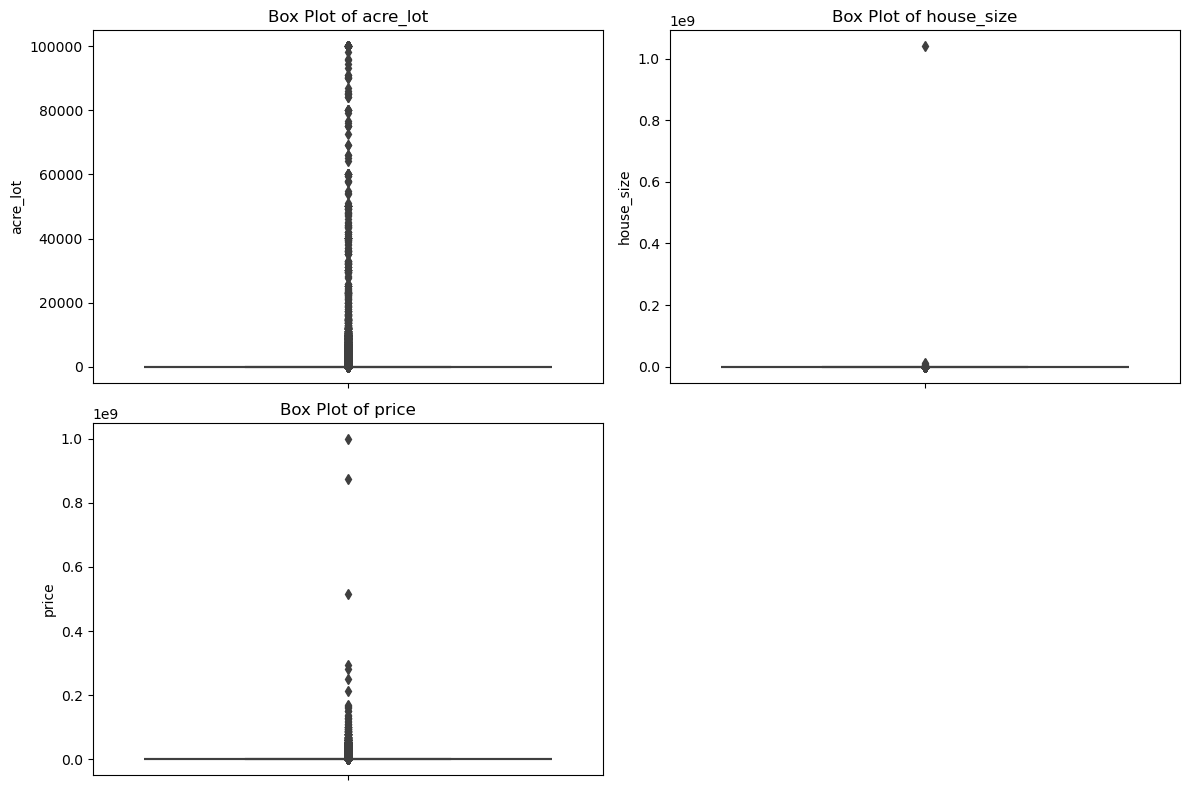

In [14]:
#Since I intend to impute remaining variables using mean or median imputation,I am going to first plot acre_lot and house_size variables' boxplots and 
#histogram to see the outliers and distribution. I also plotted price variable to see outliers there

import matplotlib.pyplot as plt
import seaborn as sns

# columns to visualize
columns_to_plot = ['acre_lot','house_size', 'price']

plt.figure(figsize=(12, 8))

# Plot box plots for acre_lot, house_size
for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()


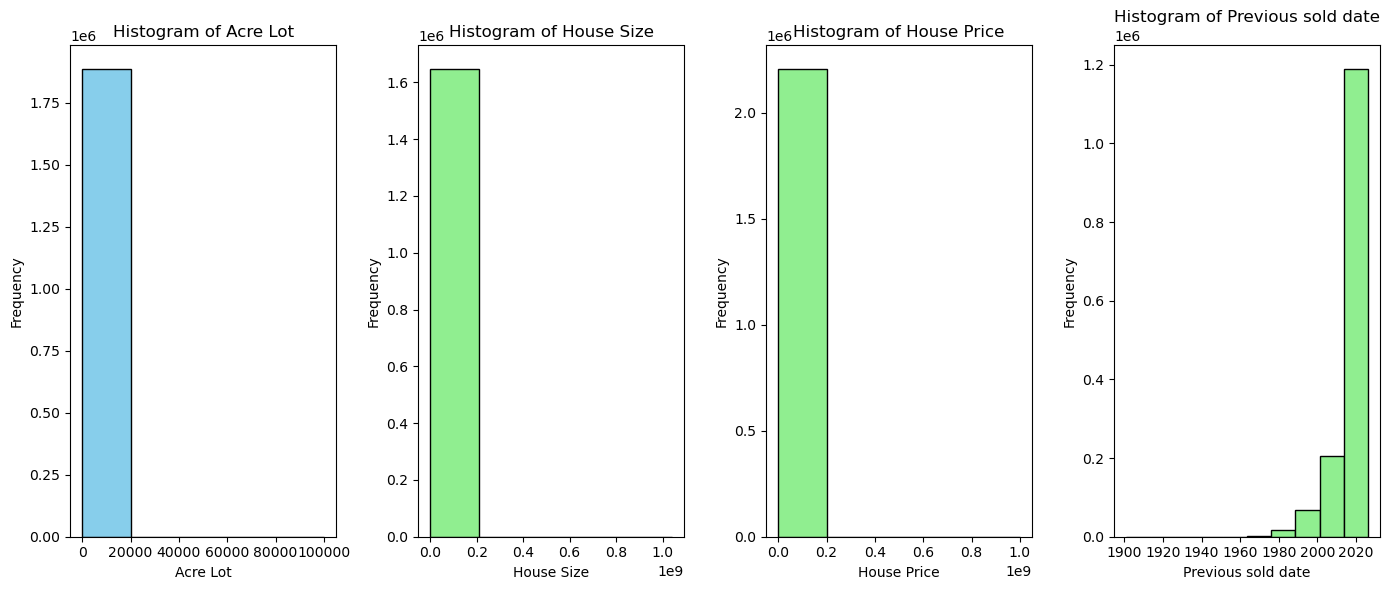

In [15]:
# Histogram for acre_lot, house_size, price and prev_sold_date
plt.figure(figsize=(14, 6))

# Plot histogram for 'acre_lot'
plt.subplot(1, 4, 1)
plt.hist(df['acre_lot'], bins=5, color='skyblue', edgecolor='black')
plt.title('Histogram of Acre Lot')
plt.xlabel('Acre Lot')
plt.ylabel('Frequency')

# Plot histogram for 'house_size'
plt.subplot(1, 4, 2)
plt.hist(df['house_size'], bins=5, color='lightgreen', edgecolor='black')
plt.title('Histogram of House Size')
plt.xlabel('House Size')
plt.ylabel('Frequency')

# Plot histogram for 'price'
plt.subplot(1, 4, 3)
plt.hist(df['price'], bins=5, color='lightgreen', edgecolor='black')
plt.title('Histogram of House Price')
plt.xlabel('House Price')
plt.ylabel('Frequency')

# Plot histogram for 'prev_sold_date'
plt.subplot(1, 4, 4)
plt.hist(df['prev_sold_date'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Histogram of Previous sold date')
plt.xlabel('Previous sold date')
plt.ylabel('Frequency')

plt.tight_layout()

# Display the plots
plt.show()


In [16]:
df.isnull().sum()

brokered_by            0
status                 0
price                  0
bed                    0
bath                   0
acre_lot          321631
street                 0
city                   0
state                  0
zip_code               0
house_size        560807
prev_sold_date    725582
dtype: int64

In [17]:
#According to initial analysis using boxplots and histograms, it seems that both variables have outliers that need to be treated before they are imputed.
#I am gonna try to remove outliers from these columns using IQR method.
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['acre_lot'].quantile(0.25)
Q3 = df['acre_lot'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_filtered = df[(df['acre_lot'] >= lower_bound) & (df['acre_lot'] <= upper_bound)]

print(df_filtered)


         brokered_by    status     price  bed  bath  acre_lot     street  \
0           103378.0  for_sale  105000.0  3.0   2.0      0.12  1962661.0   
1            52707.0  for_sale   80000.0  4.0   2.0      0.08  1902874.0   
2           103379.0  for_sale   67000.0  2.0   1.0      0.15  1404990.0   
3            31239.0  for_sale  145000.0  4.0   2.0      0.10  1947675.0   
4            34632.0  for_sale   65000.0  6.0   2.0      0.05   331151.0   
...              ...       ...       ...  ...   ...       ...        ...   
2226377      23009.0      sold  359900.0  4.0   2.0      0.33   353094.0   
2226378      18208.0      sold  350000.0  3.0   2.0      0.10  1062149.0   
2226379      76856.0      sold  440000.0  6.0   3.0      0.50   405677.0   
2226380      53618.0      sold  179900.0  2.0   1.0      0.09   761379.0   
2226381     108243.0      sold  580000.0  5.0   3.0      0.31   307704.0   

               city        state  zip_code  house_size prev_sold_date  
0          Adju

In [18]:
Q1 = df_filtered['house_size'].quantile(0.25)
Q3 = df_filtered['house_size'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_filtered = df_filtered[(df_filtered['house_size'] >= lower_bound) & (df_filtered['house_size'] <= upper_bound)]

print(df_filtered)

         brokered_by    status     price  bed  bath  acre_lot     street  \
0           103378.0  for_sale  105000.0  3.0   2.0      0.12  1962661.0   
1            52707.0  for_sale   80000.0  4.0   2.0      0.08  1902874.0   
2           103379.0  for_sale   67000.0  2.0   1.0      0.15  1404990.0   
3            31239.0  for_sale  145000.0  4.0   2.0      0.10  1947675.0   
5           103378.0  for_sale  179000.0  4.0   3.0      0.46  1850806.0   
...              ...       ...       ...  ...   ...       ...        ...   
2226377      23009.0      sold  359900.0  4.0   2.0      0.33   353094.0   
2226378      18208.0      sold  350000.0  3.0   2.0      0.10  1062149.0   
2226379      76856.0      sold  440000.0  6.0   3.0      0.50   405677.0   
2226380      53618.0      sold  179900.0  2.0   1.0      0.09   761379.0   
2226381     108243.0      sold  580000.0  5.0   3.0      0.31   307704.0   

                  city        state  zip_code  house_size prev_sold_date  
0           

In [19]:
Q1 = df_filtered['price'].quantile(0.25)
Q3 = df_filtered['price'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_filtered = df_filtered[(df_filtered['price'] >= lower_bound) & (df_filtered['price'] <= upper_bound)]

print(df_filtered)

         brokered_by    status     price  bed  bath  acre_lot     street  \
0           103378.0  for_sale  105000.0  3.0   2.0      0.12  1962661.0   
1            52707.0  for_sale   80000.0  4.0   2.0      0.08  1902874.0   
2           103379.0  for_sale   67000.0  2.0   1.0      0.15  1404990.0   
3            31239.0  for_sale  145000.0  4.0   2.0      0.10  1947675.0   
5           103378.0  for_sale  179000.0  4.0   3.0      0.46  1850806.0   
...              ...       ...       ...  ...   ...       ...        ...   
2226377      23009.0      sold  359900.0  4.0   2.0      0.33   353094.0   
2226378      18208.0      sold  350000.0  3.0   2.0      0.10  1062149.0   
2226379      76856.0      sold  440000.0  6.0   3.0      0.50   405677.0   
2226380      53618.0      sold  179900.0  2.0   1.0      0.09   761379.0   
2226381     108243.0      sold  580000.0  5.0   3.0      0.31   307704.0   

                  city        state  zip_code  house_size prev_sold_date  
0           

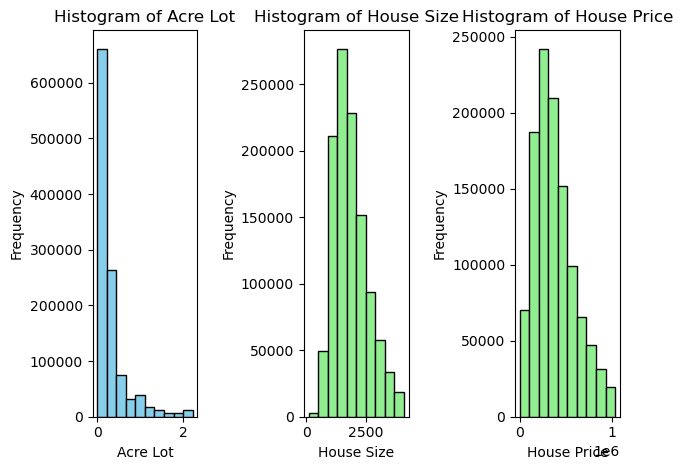

In [21]:
#Histogram of varibales after removing outlier with IQR method
# Now let's recreate the histograms to see if there's any change in the distributions of those variables
# Plot histogram for 'acre_lot'
plt.subplot(1, 3, 1)
plt.hist(df_filtered['acre_lot'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Acre Lot')
plt.xlabel('Acre Lot')
plt.ylabel('Frequency')

# Plot histogram for 'house_size'
plt.subplot(1, 3, 2)
plt.hist(df_filtered['house_size'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Histogram of House Size')
plt.xlabel('House Size')
plt.ylabel('Frequency')

# Plot histogram for 'price'
plt.subplot(1, 3, 3)
plt.hist(df_filtered['price'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Histogram of House Price')
plt.xlabel('House Price')
plt.ylabel('Frequency')

plt.tight_layout()

# Display the plots
plt.show()



In [27]:
#impute house_size column using mean imputation as it shows normal distribution, acre_lot and prev_sold_date with median as they don't show normality.
mean_size = df_filtered['house_size'].mean()
median_acre_lot = df_filtered['acre_lot'].median()
median_sold_date = df_filtered['prev_sold_date'].median()

# Imputation with mean_size
df_filtered['house_size'].fillna(mean_size, inplace=True)
df_filtered['acre_lot'].fillna(median_acre_lot, inplace=True)
df_filtered['prev_sold_date'].fillna(median_sold_date, inplace=True)

df_filtered = df_filtered[(df_filtered['prev_sold_date'] >= '2000-01-01') & (df['prev_sold_date'] <= '2022-12-31')]


C:\Users\orkha\AppData\Local\Temp\ipykernel_27236\1040608297.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[(df_filtered['prev_sold_date'] >= '2000-01-01') & (df['prev_sold_date'] <= '2022-12-31')]


In [29]:
#Since the dataframe is clean now, I am gonna import it into SQL Server for further analysis before I connect the SQL Server to Tableau desktop
#for visualizing.
#Loading the data into SQL server using append method
import sqlalchemy as sal
engine = sal.create_engine('mssql://PASHA\SQLEXPRESS/master?driver=ODBC+DRIVER+17+FOR+SQL+SERVER')
conn=engine.connect()

In [30]:
#Loading the data into SQL server using append method
#Load data
df_filtered.to_sql('us_house_new', con=conn, index=False, if_exists = 'replace')

33